In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Saving GPS_data.csv to GPS_data.csv
User uploaded file "GPS_data.csv" with length 4416814 bytes


In [ ]:
df = pd.read_csv('GPS_data.csv')

In [ ]:
lat_north = 44
lat_south = 40
lon_west = -95
lon_east = -90
mask = (df['lat'] < lat_north) & (df['lat'] > lat_south) & (df['lon'] < lon_east) & (df['lon'] > lon_west)
df_bbox = df[mask]
df_bbox.head()

,4 character station ID,MIDAS version label,"time series first epoch, in decimal year format","time series last epoch, in decimal year format",time series duration (years),"number of epochs of data, used or not","number of epochs of good data, i.e. used in at least one velocity sample",number of velocity sample pairs used to estimate midas velocity,east,north,...,east.3,north.3,up fraction of outliers,east.4,north.4,up standard deviation velocity pairs,"number of steps assumed, determined from our steps database",lat,lon,height (m) of station
1019,ALBL,MIDAS5,2013.4921,2015.1786,1.6865,601,490,490,-0.016611,-0.001641,...,0.020,0.029,0.067,0.001785,0.001849,0.006682,0,43.676566,-93.329738,371.52002
1156,AMES,MIDAS5,2014.5489,2016.2601,1.7112,609,505,505,-0.014718,0.000317,...,0.097,0.139,0.055,0.002048,0.002114,0.005998,0,41.983130,-93.683558,288.21775
2186,BLRW,MIDAS5,1999.5702,2010.6858,11.1156,3507,3507,6556,-0.015931,-0.001042,...,0.106,0.083,0.059,0.003326,0.002656,0.008880,0,43.230253,-90.530780,190.66125
4563,DOLE,MIDAS5,2010.2286,2024.2875,14.0589,4468,4468,8506,-0.015796,-0.000545,...,0.050,0.044,0.052,0.001842,0.001800,0.006756,0,42.978123,-90.128172,348.14280
4895,ELKT,MIDAS5,2008.1533,2024.3012,16.1479,4845,4845,9304,-0.015966,-0.001689,...,0.079,0.046,0.055,0.002051,0.002144,0.007221,0,43.658339,-92.688743,402.74662


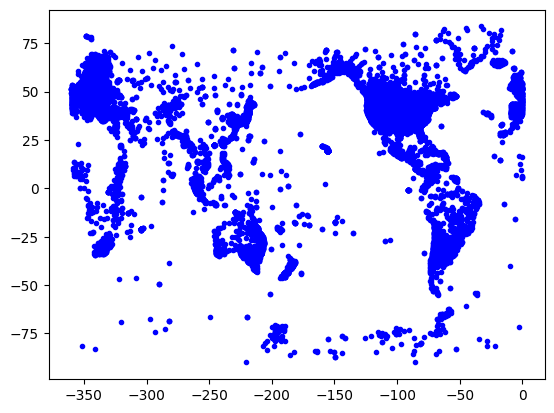

In [ ]:
plt.scatter(df['lon'], df['lat'], c='b', marker='.')

In [ ]:
plt.savefig("GPS_data plot.png")

<Figure size 640x480 with 0 Axes>

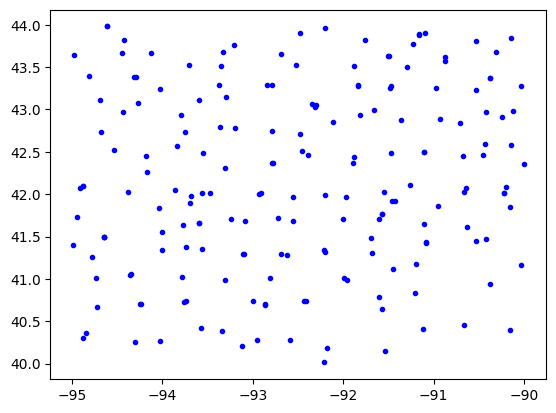

In [ ]:
plt.scatter(df_bbox['lon'], df_bbox['lat'], c='b', marker='.')

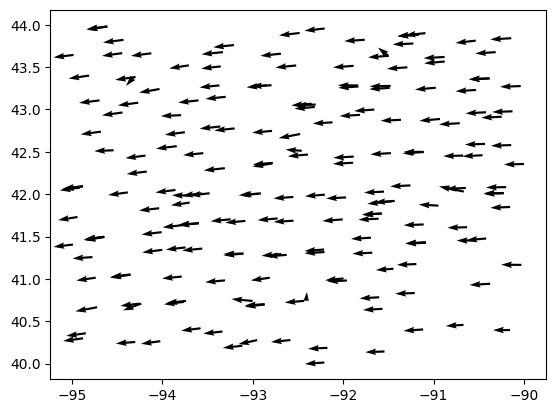

In [ ]:
plt.quiver(df_bbox['lon'], df_bbox['lat'], df_bbox['east'], df_bbox['north'])

In [ ]:
df_bbox['east'].mean()

-0.015369714285714287

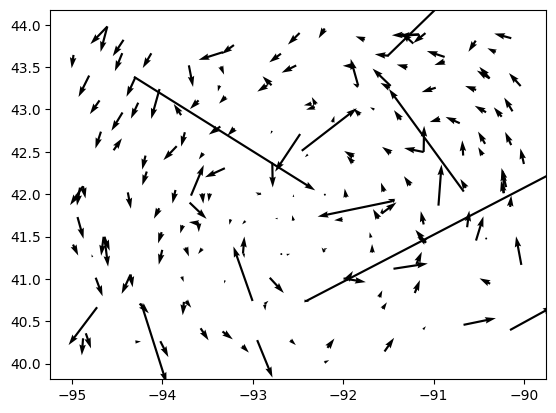

In [ ]:
plt.quiver(df_bbox['lon'], df_bbox['lat'], df_bbox['east'].mean(), df_bbox['north']-df_bbox['north'].mean())

In [ ]:
df_bbox['east'] - df_bbox['east'].mean()

1019    -0.001241
1156     0.000652
2186    -0.000561
4563    -0.000426
4895    -0.000596
           ...   
19347   -0.000646
19366   -0.000907
19370   -0.000618
19378   -0.001377
19401   -0.000724
Name: east, Length: 189, dtype: float64

In [ ]:
df_bbox.columns

Index(['4 character station ID', 'MIDAS version label ',
       'time series first epoch, in decimal year format',
       'time series last epoch, in decimal year format',
       'time series duration (years)', 'number of epochs of data, used or not',
       'number of epochs of good data, i.e. used in at least one velocity sample',
       'number of velocity sample pairs used to estimate midas velocity',
       'east', 'north', 'up mode velocities (m/yr)', 'east.1', 'north.1',
       'up mode velocity uncertainties (m/yr)', 'east.2', 'north.2',
       'up offset at at first epoch (m)', 'east.3', 'north.3',
       'up fraction of outliers', 'east.4', 'north.4',
       'up standard deviation velocity pairs',
       'number of steps assumed, determined from our steps database', 'lat',
       'lon', ' height (m) of station'],
      dtype='object')

In [ ]:
df_bbox['north.1']

1019     0.000637
1156     0.000762
2186     0.000258
4563     0.000150
4895     0.000171
           ...   
19347    0.000243
19366    0.000206
19370    0.000242
19378    0.000314
19401    0.000170
Name: north.1, Length: 189, dtype: float64

In [ ]:
df_bbox['east.1']

1019     0.000613
1156     0.000721
2186     0.000327
4563     0.000154
4895     0.000167
           ...   
19347    0.000235
19366    0.000235
19370    0.000232
19378    0.000349
19401    0.000178
Name: east.1, Length: 189, dtype: float64

In [ ]:
# define a threshold for east.1
east_1_threshold = 0.001

In [ ]:
df_filtered = df_bbox[df_bbox['east.1'] <= east_1_threshold]

In [ ]:
print(df_filtered)

In [ ]:
# define a threshold for north.1
north_1_threshold = 0.001

In [ ]:
df_filtered = df_bbox[df_bbox['north.1'] <= north_1_threshold]

In [ ]:
print(df_filtered)

Steps:
1. Remove stations with errors OR with high uncertainty
2. Project velocities into the line-of-sight of our insar velocities
3. Put the Insar velocities into the GNSS frame of reference
  - solve for a plane parameter of the difference